In [ ]:
from google.colab import drive

drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score, train_test_split
import matplotlib.pyplot as plt

In [ ]:
# Import data and normalize

data = pd.read_csv("drive/My Drive/H2O_Super.csv")[1:]
#data = pd.read_csv("drive/My Drive/Colab Notebooks/Final Project/H2O_Super.csv")[1:]

X_train, X_test, y_train, y_test = train_test_split(data.values[:, 0:2], data.values[:, 2:6], train_size=0.8, random_state=1)
X_train, X_test, y_train, y_test = X_train.astype(float), X_test.astype(float), y_train.astype(float), y_test.astype(float)

X_mean = np.mean(X_train, 0)
X_std = np.std(X_train, 0)
y_mean = np.mean(y_train, 0)
y_std = np.std(y_train, 0)

X_train = (X_train - X_mean) / X_std
X_test = (X_test - X_mean) / X_std
y_train = (y_train - y_mean) / y_std
y_test = (y_test - y_mean) / y_std

# summarize loaded dataset
print('Train: X=%s, y=%s' % (X_train.shape, y_train.shape))
print('Test : X=%s, y=%s' % (X_test.shape, y_test.shape))

Train: X=(1306, 2), y=(1306, 4)
Test : X=(327, 2), y=(327, 4)


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Text(0, 0.5, 'Weighted SSE')

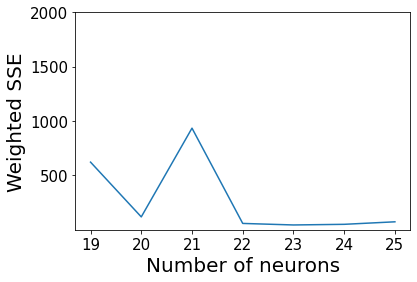

In [ ]:
# Model comparison
scores = []
values = range(7, 14)

for first in values:
  model = MLPRegressor(hidden_layer_sizes=(21, first, 4), solver='lbfgs', max_iter=16000, verbose=False, random_state=1, validation_fraction=0.3)
  model.fit(X_train, y_train)

  y_pred = model.predict(X_test)
  scores.append(np.sum((y_test - y_pred) ** 2) * first)

# Plot scores versus number of parameters
plt.figure()
plt.plot(values, scores)
plt.xticks(values, fontsize=15)
plt.yticks([500, 1000, 1500, 2000], fontsize=15)
plt.xlabel('Number of neurons', fontsize=20)
plt.ylabel('Weighted SSE', fontsize=20)

In [ ]:
# Actual model
model = MLPRegressor(hidden_layer_sizes=(21, 10, 4), solver='lbfgs', max_iter=16000, verbose=False, random_state=1, validation_fraction=0.3)
model.fit(X_train, y_train)

MLPRegressor(hidden_layer_sizes=(21, 10, 4), max_iter=16000, random_state=1,
             solver='lbfgs', validation_fraction=0.3)

In [ ]:
y_pred = model.predict(X_test)

vol_error = y_test[:,0] - y_pred[:,0]
vol_SSE = np.sum(vol_error ** 2)

energy_error = y_test[:,1] - y_pred[:,1]
energy_SSE = np.sum(energy_error ** 2)

enth_error = y_test[:,2] - y_pred[:,2]
enth_SSE = np.sum(enth_error ** 2)

entr_error = y_test[:,3] - y_pred[:,3]
entr_SSE = np.sum(entr_error ** 2)

print('Volume SSE: {:.4f}'.format(vol_SSE))
print('Energy SSE: {:.4f}'.format(energy_SSE))
print('Enthalpy SSE: {:.4f}'.format(enth_SSE))
print('Entropy SSE: {:.4f}'.format(entr_SSE))
print('Total SSE: {:.4f}'.format(vol_SSE + energy_SSE + enth_SSE + entr_SSE))
print("Model Accuracy: {:.4f}".format(model.score(X_test, y_test)))

Volume SSE: 0.8996
Energy SSE: 1.2167
Enthalpy SSE: 1.2530
Entropy SSE: 2.0977
Total SSE: 5.4669
Model Accuracy: 0.9957


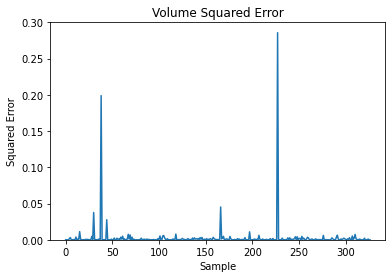

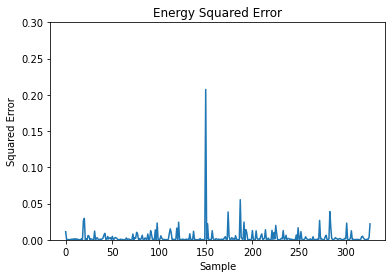

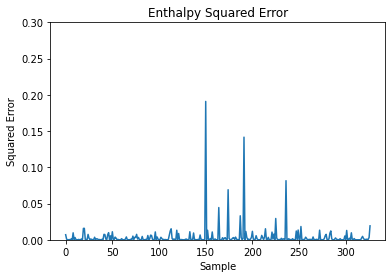

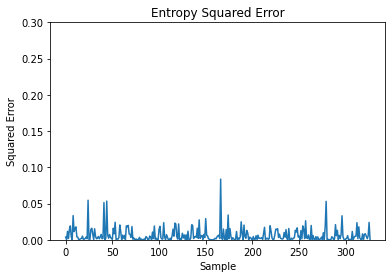

In [ ]:
labels = ['Volume', 'Energy', 'Enthalpy', 'Entropy']
y_count = np.arange(0,len(y_pred),1)
y_errors = [vol_error,energy_error,enth_error,entr_error]

for i in range(len(y_errors)):
  plt.plot(y_count,y_errors[i]**2)
  plt.title(labels[i] + ' Squared Error')
  plt.ylabel('Squared Error')
  plt.xlabel('Sample')
  plt.ylim([0, 0.3])
  plt.show()